In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.iloc[0]   

Airline                  IndiGo
Date_of_Journey      24/03/2019
Source                 Banglore
Destination           New Delhi
Route                 BLR → DEL
Dep_Time                  22:20
Arrival_Time       01:10 22 Mar
Duration                 2h 50m
Total_Stops            non-stop
Additional_Info         No info
Price                      3897
Name: 0, dtype: object

In [9]:
train_data.loc[0]

Airline                  IndiGo
Date_of_Journey      24/03/2019
Source                 Banglore
Destination           New Delhi
Route                 BLR → DEL
Dep_Time                  22:20
Arrival_Time       01:10 22 Mar
Duration                 2h 50m
Total_Stops            non-stop
Additional_Info         No info
Price                      3897
Name: 0, dtype: object

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.shape

(10682, 11)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

Seperating the day and month from the date of journey

In [13]:
train_data["Journey_day"]= pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [14]:
train_data["Jouney_month"]= pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jouney_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
train_data.drop(columns= "Date_of_Journey", axis = 1,inplace= True)

In [17]:
train_data["Dep_hr"]= pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [18]:
train_data["Dep_min"]=pd.to_datetime(train_data.Dep_Time,format= "%H:%M").dt.minute

In [19]:
train_data.drop(columns="Dep_Time", axis= 1,inplace=True)

### Seperating the hour and minute format in Arrival time

In [20]:
train_data["Arrival_hr"]= pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"]= pd.to_datetime(train_data.Arrival_Time).dt.minute

In [21]:
train_data.drop(columns= "Arrival_Time", axis=1, inplace= True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jouney_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
duration = list(train_data["Duration"])

duration_hr = []
duration_min = []
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]

for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep ="h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [24]:
train_data.drop(columns="Duration", axis =1 , inplace= True)

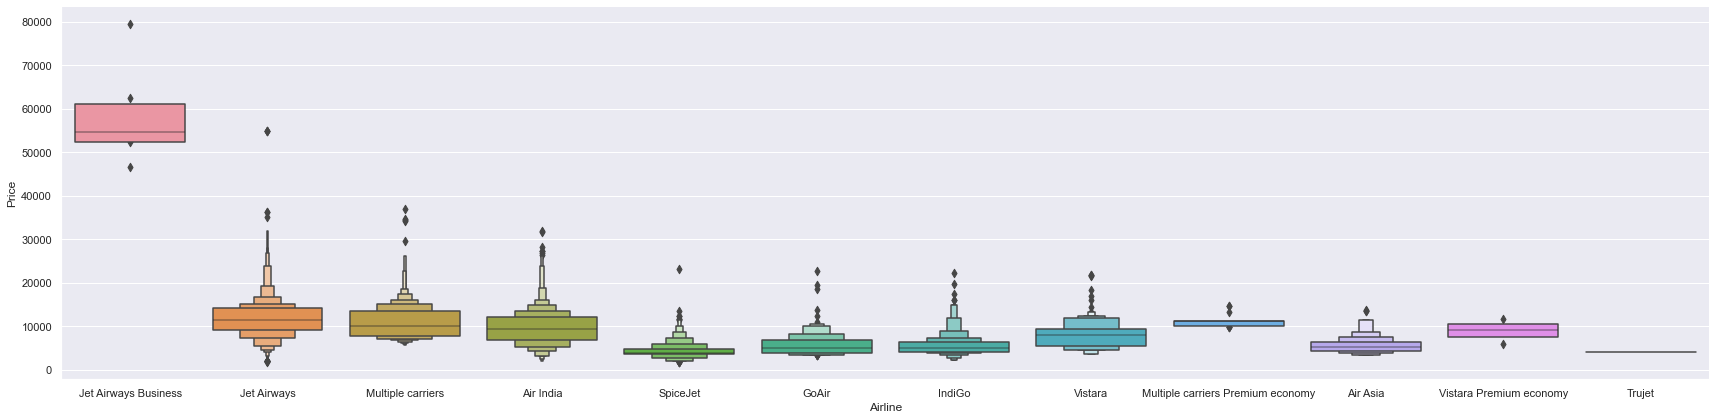

In [25]:
#Airline vs Price

sns.catplot(y="Price", x="Airline", data= train_data.sort_values("Price",ascending=False),kind="boxen",height=6, aspect =4)
plt.show()

In [26]:
# Performing OneHotEncoding

Airline = train_data['Airline']

Airline= pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

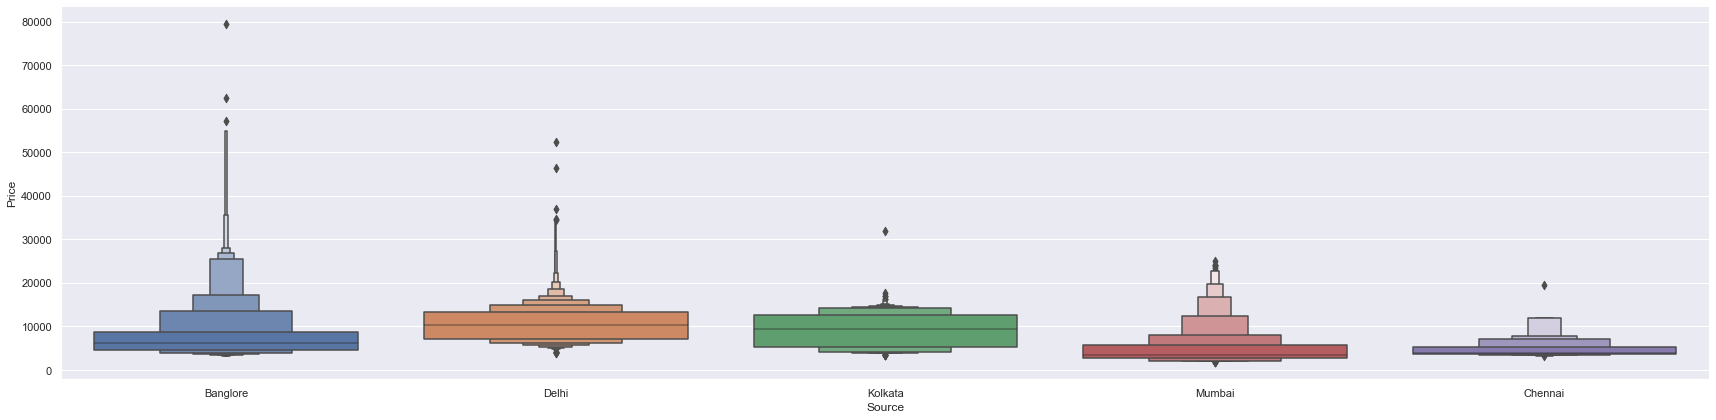

In [28]:
#Source vs Price

sns.catplot(y= "Price",x= "Source",data= train_data.sort_values("Price", ascending= False),height= 6 ,aspect= 4, kind="boxen")
plt.show()

In [29]:
# OneHotEncoding for the Source

Source = train_data.Source

Source = pd.get_dummies(train_data.Source,drop_first= True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
#OneHotEncoding for Destination

Destination = train_data.Destination

Destination = pd.get_dummies(train_data["Destination"],drop_first= True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
# Additional info contains 80% of no_info
# Route and Total_stops are related to each other

train_data.drop(["Route","Additional_Info"],axis= 1, inplace= True)

In [33]:
#Total Stops

train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
# train_data.Total_Stops.replace(to_replace=["non-stop","1 stop","2 stops"], value= [0,1,2] )

# OR

train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3,"4 stops":4},inplace=True)


In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Jouney_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35


In [45]:
train_data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [47]:
# Concatenate dataframe -> train_data + Airline + Source + Destination

data_train = pd.concat([train_data,Airline,Source,Destination],axis=1)

data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Jouney_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
# Dropping the columns Airline, Source and Destination 

data_train.drop(["Source","Destination","Airline"],axis=1, inplace=True)

In [51]:
data_train.head()

,Total_Stops,Price,Journey_day,Jouney_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.shape

(10682, 28)

<hr>

## Test Data